
# Clusterização de Pokemóns
## Integrantes:
Alessandra Blücher; 
Bruno Arthur Cesconetto; 
Dennis Zaramelo Felex -
2°C


## Introdução
<br>
Clusterização é a classificação não-supervisionada de dados, formando agrupamentos ou clusters. Ela representa uma das principais etapas de processos de análise de dados, denominada análise de clusters (JAIN et al., 1999).
</br>
<br>
A análise de clusters envolve, portanto, a organização de um conjunto de padrões em clusters, de acordo com alguma medida de similaridade.
</br>
<br>
### O método K-Means
<br>
O método K-Means clusteriza dados na tentativa de separar amostras em N grupos de igual variância, minimizando um critério denominado "inércia". Este algorítimo precisa de um número de clusters especifico e é eficiente ao utilizar-se uma grande quantidade de amostras, sendo utilizado em muitas aplicações e em diferentes áreas. 
</br>
<br>
O algorítimo do método K-Means divide uma amostra em K clusters diferentes, sendo cada um descrito por uma média <i>Uj</i> das variáveis separadas no clustercem questão. As médias são normalmente chamadas de "centróides" do cluster - na maioria das vezes, eles não são pontos que fazem parte das amostras, apesar de estarem no mesmo espaço. O algoritimo K-Means procura definir centroides os quais minimizem a o critério de "inercia".
</br>
<br>
A inércia é dada pela medida de quão coerentes são as variáveis postas num cluster internamente. 
</br>
<br>
•	A inércia assume que os clusters são convexos e isotrópicos, por mais que nem sempre sejam assim. Este coeficiente não é tão preciso quando os clusters forem vastos ou muito heterogêneos entre si (diferentes formas e tamanhos); 
</br>
<br>
•	A inercia não é uma métrica normalizada: sabe-se que valores baixos são os melhores e zeros constituem o caso ideal. Porém, em espaços com muitas dimensões, as distancias euclidianas tendem a se tornar “infladas”. Executar algoritmos de redução de dimensões antes de realizar a clusterização por K-Means, como o PCA, pode atenuar este problema e aumentar a velocidade dos cálculos.     
</br>

# Objetivos
<br>
O trabalho em questão buscará classificar os clusters resultantes de um dataframe de Pokémons clusterizado pelo método K-Means. Encontrando as características que definem cada cluster, é possível definir quais as habilidades e fraquezas dos pokémons integrantes de cada um deles, o que é útil para as batalhas propostas nos jogos da franquia. 
</br>

In [1]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #para gráficos estilizados
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#lendo os dataframes
pokemons = pd.read_json('pokedex.json')
itens = pd.read_json('items.json')
habilidades = pd.read_json('skills.json')
tipos = pd.read_json('types.json')

In [3]:
#abrindo o dicionário contido em pokemons.base e adicionando novas colunas ao dataframe, uma para cada atributo do dicionário: 

#criando listas as quais armazenam os valores de um mesmo atributo
Attack= []
Defense = []
HP = []
SpAtk = []
SpDef = []
Speed = []

#percorrendo o dicionário e adicionando os valores às listas
for idx, row in pokemons['base'].iteritems(): #para cada index i, em cada linha dessa coluna base...
    l=row.keys()   #l é uma variável que contempla as chaves do dicionário

    if 'Attack' in l:   #quando a variável assume a chave ataque
        Attack.append(row['Attack']) #adicionamos seu valor a lista externa "ataque"
    else:
        Attack.append(None) #caso não haja, pass
    if 'Defense' in l:
        Defense.append(row['Defense'])
    else:
        Defense.append(None)
    if 'HP' in l:
        HP.append(row['HP'])
    else:
        HP.append(None)
    if 'Sp.Atk' in l:
        SpAtk.append(row['Sp.Atk'])
    else:
        SpAtk.append(None)
    if 'Sp.Def' in l:
        SpDef.append(row['Sp.Def'])
    else:
        SpDef.append(None) 
    if 'Speed' in l:
        Speed.append(row['Speed'])
    else:
        Speed.append(None)
    
#criando as novas colunas com os valores separados
pokemons['Attack']=Attack
pokemons['Defense']=Defense
pokemons['HP']=HP
pokemons['Sp.Atk']=SpAtk
pokemons['Sp.Def']=SpDef
pokemons['Speed']=Speed


In [4]:
#selecionando as colunas de interesse do dataframe
df = pokemons[['ename','type','Attack','Defense','HP','Sp.Atk','Sp.Def','Speed']]

#renomenando as colunas
df.columns = ['nome','tipo','ataque','defesa','HP','spe.atk','spe.def','velocidade']

df.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60
2,Venusaur,"[草, 毒]",82,83,80,100,100,80
3,Charmander,[炎],52,43,39,60,50,65
4,Charmeleon,[炎],64,58,58,80,65,80


## Explicação e Exemplos de aplicação de clusterização

Referência teórica para diferentes métodos de clusterzação: <br>
http://scikit-learn.org/stable/modules/clustering.html</br>

Exemplos de clusterização por K-means:<br> http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html</br>
<br>http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py</br>

# Verificando o número ideal de clusters

O método de distorção visa obter o número ideal de clusters ao se comparar o comportamento dos clusters para n clusters de uma mesma amostra. Quando a distorção passar a ter baixa variabilidade, mesmo aumentando o número de clusters, tem-se um número bom de divisões. Mais que isso torna os clusters basicamente singulares, ou seja, chegando a apenas 1 característica em específico os definindo e, menos que o ideal, deixa-os muito heterogêneos.

In [5]:
#guarando os dados em variáveis
v1 = df['ataque']
v2 = df['defesa']
v3 = df['HP']
v4 = df['spe.atk']
v5 = df['spe.def']
v6 = df['velocidade']

#as variáveis serão componentes de uma matriz
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

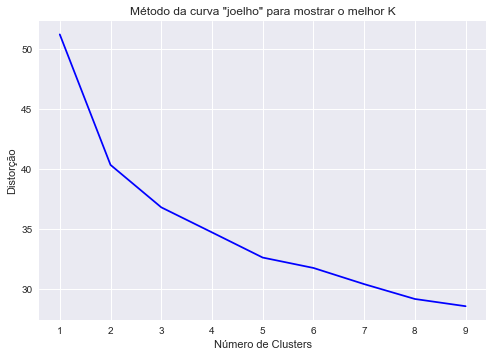

In [6]:
#kmeans determina o k ideal
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plotando 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.title('Método da curva "joelho" para mostrar o melhor K')
plt.show()
 

Pelo gráfico acima, nota-se que 4 clusters é um número razoável para a divisão do dataframe de Pokemóns utilizado.

# Clusterizando o Dataframe

Será considerada na clusterização 4 variáveis: ataque, defesa, hp e velocidade; <br>
Como um gráfico 3D adimite apenas 3 variáveis, vamos "quebrar" a quarta variável em faixas e, a partir desta delimitação, será plotado o gráfico com os clusters, visualizando os pontos definidos pelas variáveis restantes dos Pokemóns os quais se encaixarem na delimitação em questão.</br>

In [7]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
df.loc[:,'cluster'] = kmeans.labels_ #indentificando cada um dos pokemóns por seu cluster numa nova coluna, em caso de futuro material de análise

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Função-Plot do fit realizado pelo Kmeans 

In [8]:
#função que plota o gráfico com os clusters


def showcluster(info, k, color, titulo):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(titulo)
    ax.set_xlabel(str(info[0].name))
    ax.set_ylabel(str(info[1].name))
    ax.set_zlabel(str(info[2].name))
    if k!=len(color):
        print ("numero de cores diferente de clusters", len(color),k)
        return 0
    for i in range(0,k):
        ax.scatter(info[0][df.cluster==i], info[1][df.cluster==i], info[2][df.cluster==i], marker='o', c=color[i])
    return fig

colors = ['red','green','blue','purple']



# Clusterização com base na delimitação de uma das variáveis

### Para dado poder de ataque, como as outras três variáveis são distribuídas?

In [9]:
#ataques baixos
ataque40 = df[df.ataque<=40]

#variáveis que comporão a matriz para o fit (cada variável contém os valores de uma das colunas de interesse)
v1 = ataque40['ataque']
v2 = ataque40['defesa']
v3 = ataque40['HP']
v4 = ataque40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4) #arranjo numa matriz

In [10]:
kmeans = KMeans(n_clusters=4).fit(X) #clusterização realizada pelo módulo python
y_kmeans = kmeans.predict(X)
ataque40.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
#ataques médios
ataque80 = df[(df['ataque']>40) & (df['ataque'] <= 80)]
#repetindo o processo de clusterização
v1 = ataque80['ataque']
v2 = ataque80['defesa']
v3 = ataque80['HP']
v4 = ataque80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [12]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataque80.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
#ataques fortes
ataquef = df[df['ataque'] > 80]
#repetindo o processo de clusterização
v1 = ataquef['ataque']
v2 = ataquef['defesa']
v3 = ataquef['HP']
v4 = ataquef['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [14]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataquef.loc[:,'cluster'] = kmeans.labels_


C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


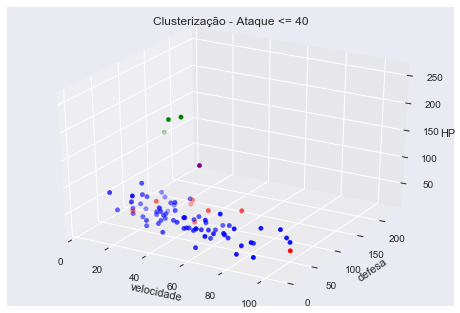

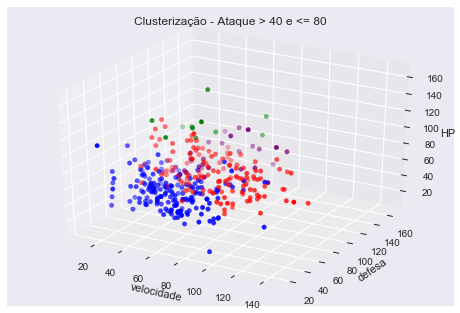

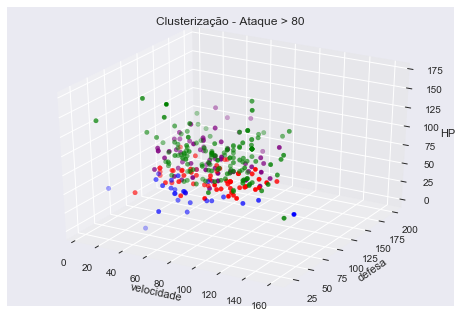

In [15]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([ataque40.velocidade,ataque40.defesa,ataque40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque <= 40')

plot = showcluster([ataque80.velocidade,ataque80.defesa,ataque80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque > 40 e <= 80')

plot = showcluster([ataquef.velocidade,ataquef.defesa,ataquef.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque > 80')

plt.show()


### Separando os dataframes de ataque por clusters

In [16]:
#ataques fracos
a400 = ataque40[ataque40.cluster==0]
a401 = ataque40[ataque40.cluster==1]
a402 = ataque40[ataque40.cluster==2]
a403 = ataque40[ataque40.cluster==3]


In [17]:
#ataques médios
a800 = ataque80[ataque80.cluster==0]
a801 = ataque80[ataque80.cluster==1]
a802 = ataque80[ataque80.cluster==2]
a803 = ataque80[ataque80.cluster==3]


In [18]:
#ataques fortes
af0 = ataquef[ataquef.cluster==0]
af1 = ataquef[ataquef.cluster==1]
af2 = ataquef[ataquef.cluster==2]
af3 = ataquef[ataquef.cluster==3]


### Porcentagem dos Pokemóns clusterizados por cluster

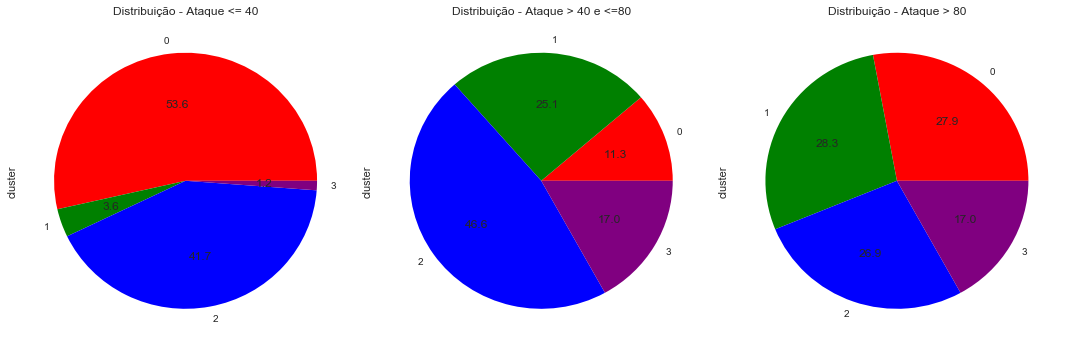

In [19]:
#value_counts
a40vc=(ataque40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
a80vc=(ataque80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
afvc = (ataquef.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = a40vc.plot(kind='pie',title='Distribuição - Ataque <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = a80vc.plot(kind='pie',title='Distribuição - Ataque > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = afvc.plot(kind='pie',title='Distribuição - Ataque > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


### Para dada capacidade de defesa, como as outras três variáveis são distribuídas?

In [20]:
#defesas baixas
defesa40 = df[df.defesa<=40]

#repetindo o processo de clusterização
v1 = defesa40['ataque']
v2 = defesa40['defesa']
v3 = defesa40['HP']
v4 = defesa40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [21]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa40.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
#defesas médias
defesa80 = df[(df['defesa']>40) & (df['defesa'] <= 80)]
#repetindo o processo de clusterização
v1 = defesa80['ataque']
v2 = defesa80['defesa']
v3 = defesa80['HP']
v4 = defesa80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [23]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa80.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
#defesas fortes
defesaf = df[df['defesa'] > 80]
#repetindo o processo de clusterização
v1 = defesaf['ataque']
v2 = defesaf['defesa']
v3 = defesaf['HP']
v4 = defesaf['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [25]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesaf.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


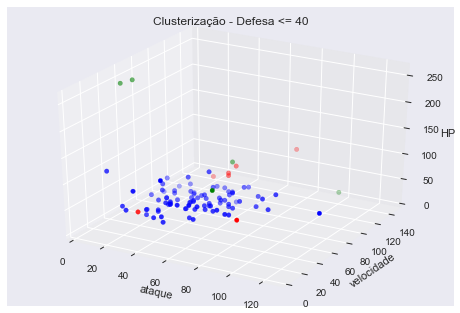

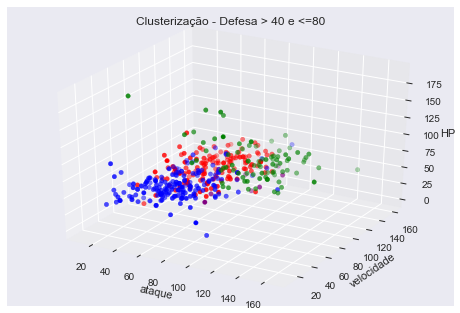

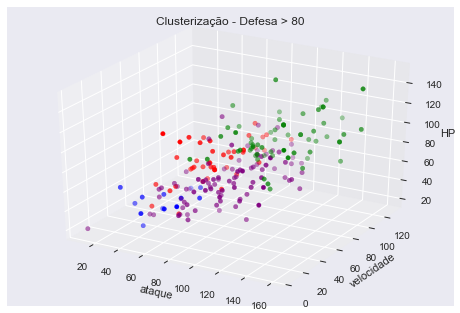

In [26]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([defesa40.ataque,defesa40.velocidade,defesa40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa <= 40')

plot = showcluster([defesa80.ataque,defesa80.velocidade,defesa80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa > 40 e <=80')

plot = showcluster([defesaf.ataque,defesaf.velocidade,defesaf.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa > 80')

plt.show()

### Separando os dataframes de defesa por clusters

In [27]:
#defesas fracas
d400 = defesa40[defesa40.cluster==0]
d401 = defesa40[defesa40.cluster==1]
d402 = defesa40[defesa40.cluster==2]
d403 = defesa40[defesa40.cluster==3]


In [28]:
#defesas médias
d800 = defesa80[defesa80.cluster==0]
d801 = defesa80[defesa80.cluster==1]
d802 = defesa80[defesa80.cluster==2]
d803 = defesa80[defesa80.cluster==3]


In [29]:
#defesas fortes
df0 = defesaf[defesaf.cluster==0]
df1 = defesaf[defesaf.cluster==1]
df2 = defesaf[defesaf.cluster==2]
df3 = defesaf[defesaf.cluster==3]


### Porcentagem dos Pokemóns clusterizados por cluster

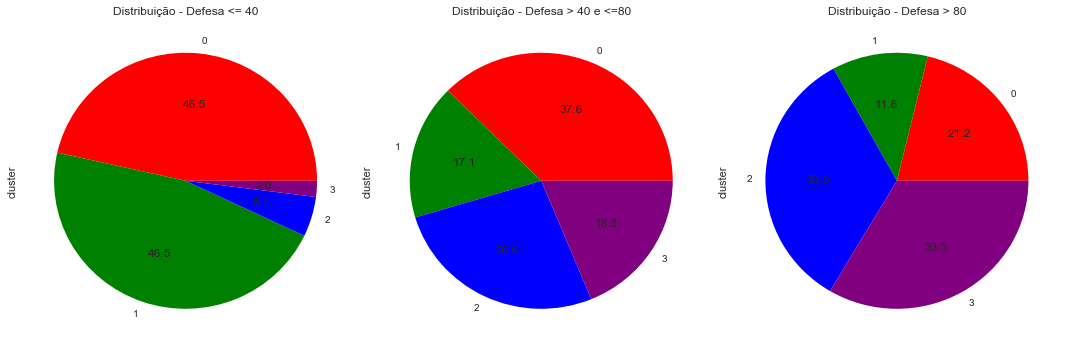

In [30]:
#value_counts
d40vc=(defesa40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
d80vc=(defesa80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
dfvc=(defesaf.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = d40vc.plot(kind='pie',title='Distribuição - Defesa <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = d80vc.plot(kind='pie',title='Distribuição - Defesa > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = dfvc.plot(kind='pie',title='Distribuição - Defesa > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


   ### Para dado nível de HP, como as outras três variáveis são distribuídas?

In [31]:
#HP baixo
HP40 = df[df.HP<=40]

#repetindo o processo de clusterização
v1 = HP40['ataque']
v2 = HP40['defesa']
v3 = HP40['HP']
v4 = HP40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [32]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP40.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
#HP médio
HP80 = df[(df['HP']>40) & (df['HP'] <= 80)]
#repetindo o processo de clusterização
v1 = HP80['ataque']
v2 = HP80['defesa']
v3 = HP80['HP']
v4 = HP80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [34]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP80.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
#HP alto
HPa = df[df['HP'] > 80]
#repetindo o processo de clusterização
v1 = HPa['ataque']
v2 = HPa['defesa']
v3 = HPa['HP']
v4 = HPa['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [36]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HPa.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


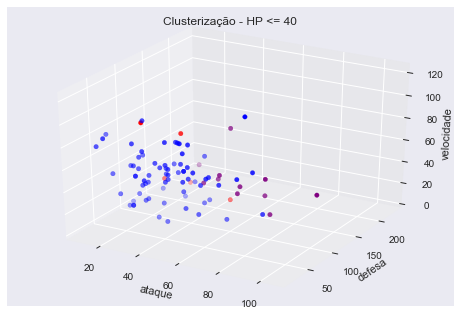

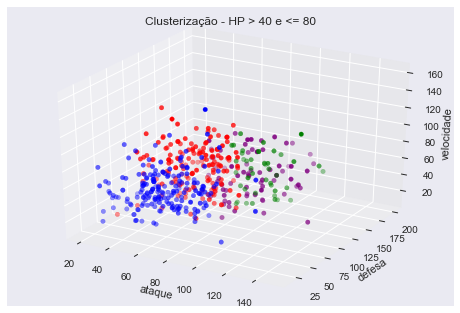

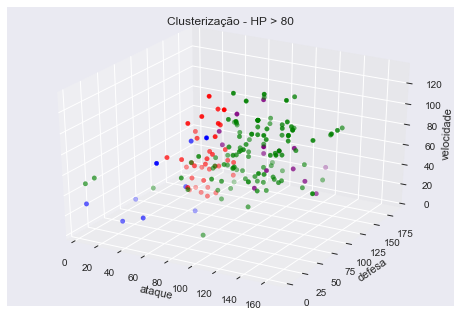

In [37]:
#área de plotagem

fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([HP40.ataque,HP40.defesa,HP40.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP <= 40')

plot = showcluster([HP80.ataque,HP80.defesa,HP80.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP > 40 e <= 80')

plot = showcluster([HPa.ataque,HPa.defesa,HPa.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP > 80')

plt.show()


### Separando os dataframes de HP por clusters

In [38]:
#HP Baixo
hp400 = HP40[HP40.cluster==0]
hp401 = HP40[HP40.cluster==1]
hp402 = HP40[HP40.cluster==2]
hp403 = HP40[HP40.cluster==3]


In [39]:
#HP Médio
hp800 = HP80[HP80.cluster==0]
hp801 = HP80[HP80.cluster==1]
hp802 = HP80[HP80.cluster==2]
hp803 = HP80[HP80.cluster==3]


In [40]:
#HP Alto
hpa0 = HPa[HPa.cluster==0]
hpa1 = HPa[HPa.cluster==1]
hpa2 = HPa[HPa.cluster==2]
hpa3 = HPa[HPa.cluster==3]


### Porcentagem dos Pokemóns clusterizados por cluster

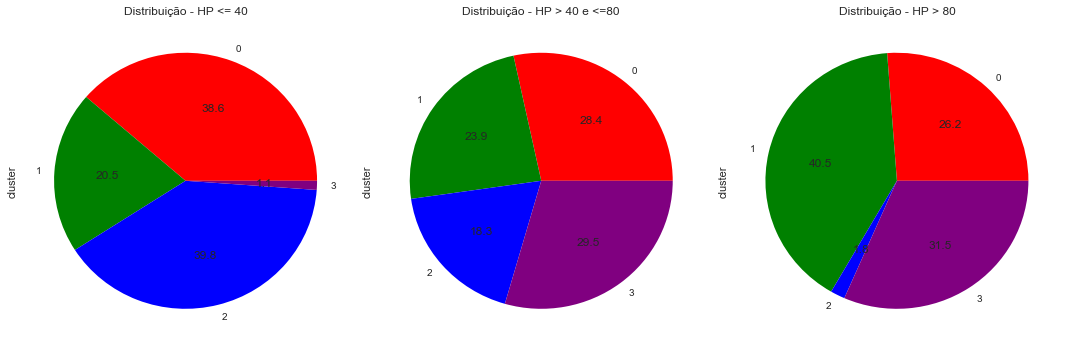

In [41]:
#value_counts
hp40vc=(HP40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
hp80vc=(HP80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
hpavc=(HPa.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = hp40vc.plot(kind='pie',title='Distribuição - HP <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = hp80vc.plot(kind='pie',title='Distribuição - HP > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = hpavc.plot(kind='pie',title='Distribuição - HP > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


### Para dada velocidade do pokemón, como as outras três variáveis são distribuídas?

In [42]:
#Velocidade baixa
V40 = df[df.velocidade<=40]

#repetindo o processo de clusterização
v1 = V40['ataque']
v2 = V40['defesa']
v3 = V40['HP']
v4 = V40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [43]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V40.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
#Velocidade média
V80 = df[(df['velocidade']>40) & (df['velocidade'] <= 80)]
#repetindo o processo de clusterização
v1 = V80['ataque']
v2 = V80['defesa']
v3 = V80['HP']
v4 = V80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [45]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V80.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
#Velocidade alta
Va = df[df['velocidade'] > 80]
#repetindo o processo de clusterização
v1 = Va['ataque']
v2 = Va['defesa']
v3 = Va['HP']
v4 = Va['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [47]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
Va.loc[:,'cluster'] = kmeans.labels_

C:\Users\bruno\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


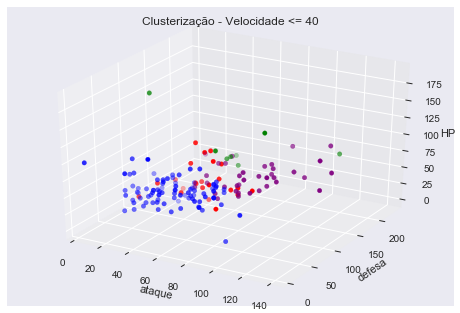

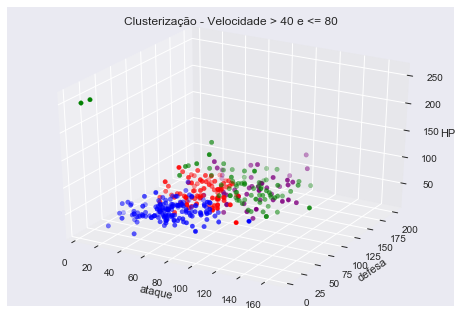

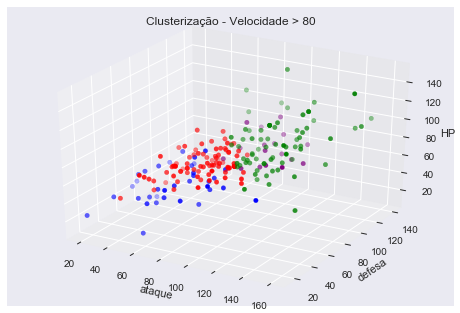

In [48]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([V40.ataque,V40.defesa,V40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade <= 40')

plot = showcluster([V80.ataque,V80.defesa,V80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade > 40 e <= 80')

plot = showcluster([Va.ataque,Va.defesa,Va.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade > 80')

plt.show()

### Separando os dataframes de defesa por clusters

In [49]:
#Velocidades baixas
v400 = V40[V40.cluster==0]
v401 = V40[V40.cluster==1]
v402 = V40[V40.cluster==2]
v403 = V40[V40.cluster==3]


In [50]:
#Velocidades médias
v800 = V80[V80.cluster==0]
v801 = V80[V80.cluster==1]
v802 = V80[V80.cluster==2]
v803 = V80[V80.cluster==3]


In [51]:
#Velocidades altas
va0 = Va[Va.cluster==0]
va1 = Va[Va.cluster==1]
va2 = Va[Va.cluster==2]
va3 = Va[Va.cluster==3]


### Porcentagem dos Pokemóns clusterizados por cluster

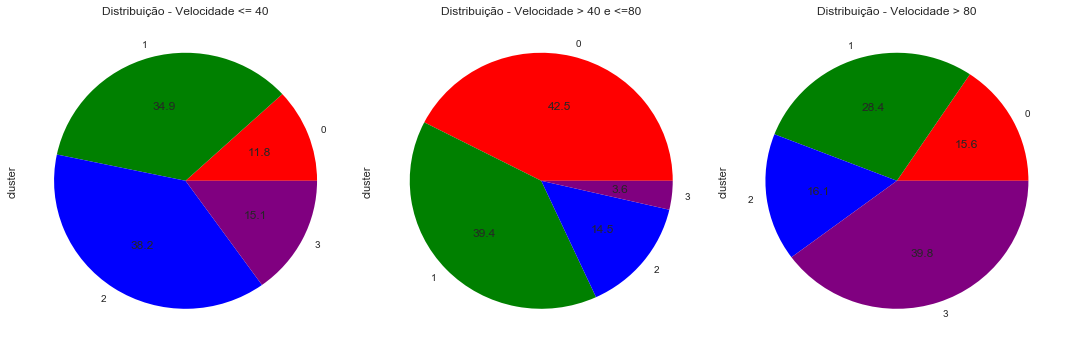

In [52]:
#value_counts
v40vc=(V40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
v80vc=(V80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
vavc=(Va.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = v40vc.plot(kind='pie',title='Distribuição - Velocidade <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = v80vc.plot(kind='pie',title='Distribuição - Velocidade > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = vavc.plot(kind='pie',title='Distribuição - Velocidade > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


## Por fim, será analisado o dataframe completo, também filtrado por cluster:

In [53]:
#filtragem
cluster0 = df[df.cluster==0]
cluster1 = df[df.cluster==1]
cluster2 = df[df.cluster==2]
cluster3 = df[df.cluster==3]

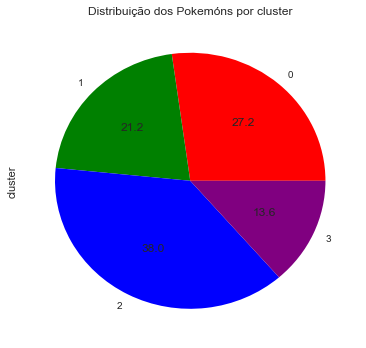

In [54]:
#value_counts
dfvc=(df.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#plot
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dfvc.plot(kind='pie',title='Distribuição dos Pokemóns por cluster',autopct='%.1f', colors=colors)
plt.tight_layout()
plt.show()

# Cluster 0

In [98]:
def deef(bloco):
    for i in bloco:
        print("media de ", i.name, ": ",i.mean())
        
    print('A média das variáveis utilizadas dos Pokémons do cluster é de:', (bloco[0].mean()+bloco[1].mean()+bloco[2].mean()+bloco[3].mean())/4)
    print('O desvio padrão de ataque dos Pokémons do cluster é de:', bloco[0].std())
    print('O desvio padrão de defesa dos Pokémons do cluster é de:', bloco[1].std())
    print('O desvio padrão de HP dos Pokémons do cluster é de:', bloco[2].std())
    print('O desvio padrão de velocidade dos Pokémons do cluster é de:', bloco[3].std())
    print('O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de:', (bloco[0].std()+bloco[1].std()+bloco[2].std()+bloco[3].std())/4)
    return 0

In [90]:
cluster0.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60,0
2,Venusaur,"[草, 毒]",82,83,80,100,100,80,0
4,Charmeleon,[炎],64,58,58,80,65,80,0
5,Charizard,"[炎, 飞行]",84,78,78,109,85,100,0
7,Wartortle,[水],63,80,59,65,80,58,0


In [88]:
deef([cluster0.ataque,cluster0.defesa,cluster0.HP,cluster0.velocidade]) #70

media de  ataque :  71.04081632653062
media de  defesa :  69.98469387755102
media de  HP :  71.15306122448979
media de  velocidade :  77.09693877551021
A média das variáveis utilizadas dos Pokémons do cluster 0 é de: 72.3188775510204
O desvio padrão de ataque dos Pokémons do cluster 0 é de: 15.811335347909104
O desvio padrão de defesa dos Pokémons do cluster 0 é de: 16.37430038930342
O desvio padrão de HP dos Pokémons do cluster 0 é de: 14.754991882500061
O desvio padrão de velocidade dos Pokémons do cluster 0 é de: 26.689588689730723
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster 0 é de: 18.407554077360828


0

Podemos observar que neste cluster encontram-se os pokemons com a media das estatisticas em torno de 70 com a media de desvios padroes em torno de 18 o que significa que sao pokemons em geral fortes com todas a estatisticas altas

# Cluster 1

In [91]:
cluster1.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
30,Nidoqueen,"[毒, 地上]",92,87,90,75,85,76,1
33,Nidoking,"[毒, 地上]",102,77,81,85,75,85,1
39,Wigglytuff,"[一般, 妖精]",70,45,140,85,50,45,1
58,Arcanine,[炎],110,80,90,100,80,95,1
61,Poliwrath,"[水, 格斗]",95,95,90,70,90,70,1


In [94]:
deef([cluster1.ataque,cluster1.defesa,cluster1.HP,cluster1.velocidade]) # ataque muito alto

media de  ataque :  108.3202614379085
media de  defesa :  80.73202614379085
media de  HP :  98.44444444444444
media de  velocidade :  78.80392156862744
A média das variáveis utilizadas dos Pokémons do cluster 0 é de: 91.57516339869281
O desvio padrão de ataque dos Pokémons do cluster 0 é de: 23.77240040433089
O desvio padrão de defesa dos Pokémons do cluster 0 é de: 21.938012712841275
O desvio padrão de HP dos Pokémons do cluster 0 é de: 28.737214294014603
O desvio padrão de velocidade dos Pokémons do cluster 0 é de: 25.23313893096928
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster 0 é de: 24.920191585539012


0

Podemos observar que neste cluster encontram-se os pokemons com a media das estatisticas em torno de 91, mas com ataques muito altos com a media de desvios padroes em torno de 24 o que significa que sao pokemons em geral de ataque, os quais dao muito dano e tem uma vida consideravelmenta alta, com todas as outras estatisticas normais

# Cluster 2

In [92]:
cluster2.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45,2
3,Charmander,[炎],52,43,39,60,50,65,2
6,Squirtle,[水],48,65,44,50,64,43,2
9,Caterpie,[虫],30,35,45,20,20,45,2
10,Metapod,[虫],20,55,50,25,25,30,2


In [95]:
deef([cluster2.ataque,cluster2.defesa,cluster2.HP,cluster2.velocidade]) # 50

media de  ataque :  54.003649635036496
media de  defesa :  49.47810218978102
media de  HP :  51.065693430656935
media de  velocidade :  54.3978102189781
A média das variáveis utilizadas dos Pokémons do cluster 0 é de: 52.23631386861313
O desvio padrão de ataque dos Pokémons do cluster 0 é de: 19.38457870043293
O desvio padrão de defesa dos Pokémons do cluster 0 é de: 15.23471654893899
O desvio padrão de HP dos Pokémons do cluster 0 é de: 14.82212205673146
O desvio padrão de velocidade dos Pokémons do cluster 0 é de: 22.965624788522984
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster 0 é de: 18.10176052365659


0

Podemos observar que neste cluster encontram-se os pokemons com a media das estatisticas em torno de 50 com a media de desvios padroes em torno de 18 o que significa que sao pokemons em geral fracos com todas as estatisticas baixas

# Cluster 3

In [93]:
cluster3.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
27,Sandslash,[地上],100,110,75,45,55,65,3
46,Parasect,"[虫, 草]",95,80,60,60,80,30,3
73,Geodude,"[岩石, 地上]",80,100,40,30,30,20,3
74,Graveler,"[岩石, 地上]",95,115,55,45,45,35,3
75,Golem,"[岩石, 地上]",120,130,80,55,65,45,3


In [97]:
deef([cluster3.ataque,cluster3.defesa,cluster3.HP,cluster3.velocidade]) # defesa muito alta

media de  ataque :  89.94897959183673
media de  defesa :  116.68367346938776
media de  HP :  64.3061224489796
media de  velocidade :  54.816326530612244
A média das variáveis utilizadas dos Pokémons do cluster 0 é de: 81.43877551020408
O desvio padrão de ataque dos Pokémons do cluster 0 é de: 23.369013075949724
O desvio padrão de defesa dos Pokémons do cluster 0 é de: 29.448748748654015
O desvio padrão de HP dos Pokémons do cluster 0 é de: 17.44884019024908
O desvio padrão de velocidade dos Pokémons do cluster 0 é de: 25.606598271271785
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster 0 é de: 23.968300071531154


0

Podemos observar que neste cluster encontram-se os pokemons com a media das estatisticas em torno de 80 com a media de desvios padroes em torno de 23, com sua defesa em destaque mas com pouca vida, que podem ser classificados como tanques de armadura, alem de ter um ataque consideravel, e outras estatisticas normais